In [131]:
import matplotlib.pyplot as plt
h = 0.25
def nextPoint(v, u, I):
    newV = v + h * (0.04*v*v + 5*v + 140 - u + I)
    newU = u + h * (a*(b*v - u))
    return newV,newU

class Neurona:
    def __init__(self, a,b,c,d,id):
        self.id = id
        self.adyacentes = []
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.v = [-65]
        self.u = [0]
        self.time = [0]
        self.I = 0
        self.tiempoI = 0
        self.adyacentes = []
        
    def getTime(self): return self.time
    def getV(self): return self.v
    def getId(self): return self.id
    
    def addAdyacente(self, a):
        self.adyacentes.append(a)
    
    def spike(self):
        self.I = 10
        self.tiempoI = 20
    
    def avanzar(self):
        i = len(self.v) - 1
        if self.tiempoI == 0 and self.I > 0: 
            self.I = 0
        elif self.tiempoI > 0:
            self.tiempoI -= 1
        self.time.append(i*h)
        newV, newU = nextPoint(self.v[i], self.u[i], self.I)
        if newV > 30:
            for a in self.adyacentes: a.spike()
            self.v.append(self.c)
            self.u.append(newU + self.d)
        else:
            self.v.append(newV)
            self.u.append(newU)
class Sistema:
    def __init__(self, neuronas = []):
        self.neuronas = neuronas
    
    def avanzar(self):
        for neurona in self.neuronas:
            neurona.avanzar()
    
    def getNeuronas(self): return self.neuronas

Conecciones 1963


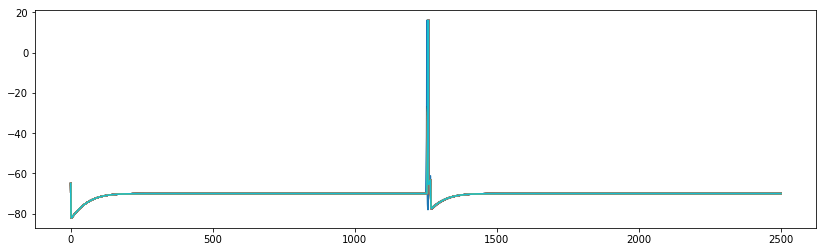

In [143]:
import random as r
a = 0.02
b = 0.2
c = -65
d = 8
neuronas = []
cantNeuronas = 50
for i in range(cantNeuronas):
    neuronas.append(Neurona(a,b,c,d,i))

# p de que dos nodos esten conectados 
p = 0.8
conecciones = 0
for neurona in neuronas:
    for posibleAdyancente in neuronas:
        if (posibleAdyancente.getId() != neurona.id and r.random() < p):
            neurona.addAdyacente(posibleAdyancente)
            conecciones += 1
print("Conecciones " + str(conecciones))
            
sistema = Sistema(neuronas)

n = 5000
for i in range(n):
    sistema.avanzar()
neuronas[0].spike()
for i in range(n):
    sistema.avanzar()
    
plt.subplots(figsize=(14,4))
for neurona in sistema.getNeuronas():
    plt.plot(neurona.getTime(), neurona.getV())
plt.show()